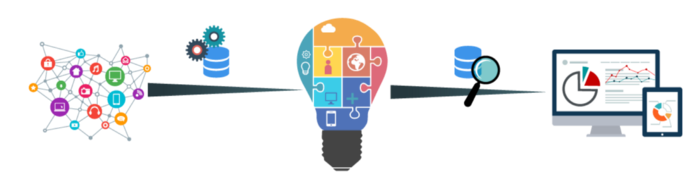

# Projeto Hashtag - Criando uma Apresentação Executiva <br>

### Contexto: Será realizado uma análise do conjunto de dados das vendas de superloja global de 4 anos (2015 a 2018). Os dados utilizados são do Kaggle, através do link https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting/data <br>
### O que queremos responder?
- Como foi a **venda** nesse período?
- Qual foi a **categoria mais vendida**?
- Qual foi o **item mais vendido**?

<br>

### Dicionário de dados:
O arquivo em excel encontra-se na pasta _dataset e possui as seguintes colunas:
* Row ID (Identificação da linha) = 9800 valores exclusivos
* Order ID (Identificação do pedido) = 4922 valores exclusivos
* Order Date (Data do pedido) = 1230 valores exclusivos
* Ship Date (Data de envio) = 1326 valores exclusivos
* Ship Mode (Modo Navio) = Standard Class (Classe padrão), Second Class (Segunda classe), First Class (Primeira classe) e Same Day (Mesmo dia)
* Customer ID (Identificação do Cliente) = 793 valores exclusivos
* Customer Name (Nome do cliente) = 793 valores exclusivos
* Segment (Segmento) = Consumer (Consumidor), Corporate (Corporativo) e Home Office (Escritório)
* Country (País) = 9800 nos United States (United States)
* City (Cidade) = 529 valores exclusivos
* State (Estado) = 49 valores exclusivos
* Postal Code (Código postal) = 627 valores exclusivos
* Region (Região) = West (Oeste), East (Leste), Central e South (Sul)
* Product ID (ID do produto) = 1861 valores exclusivos
* Category (Categoria) = Office Supplies (Material de escritório), Furniture (Mobília) e Technology (Tecnologia)
* Sub-Category (Subcategoria) = 17 valores exclusivos
* Product Name (Nome do Produto) = 1849 valores exclusivos
* Sales (Vendas) = 5757 valores exclusivos

##### Passo 1 - Importando as blibliotecas

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

##### Passo 2 - Importando a base de dados

In [2]:
df_base = pd.read_csv("_dataset/Criando uma apresentação executiva.csv")

##### Passo 3 - Visualizando os dados e as informações dos dados

In [3]:
display(df_base.head())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

##### Passo 4 - Tratando as colunas com valores nulos

In [5]:
# Apenas código postal possui valores nulos, podemos visualizar quais linhas não possuem esse valor
df_base[df_base['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [6]:
# Verificando se existe algum registro de Burlington, Vermont com Postal Code
df_base[(df_base.City == 'Burlington') & (df_base.State == 'Vermont') & (df_base['Postal Code'].notnull())]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


In [7]:
# Todos os registros sem código postal são da cidade de Burlington, em Vermont. Com isso, será necessário buscar essa informação.
# Como é uma informação de fácil pesquisa, podemos ir diretamente no google para buscar esse dado > zip code Burlington Vermont > resultado da busca 5401

# Atualizando os valores da coluna Postal Code
df_base.loc[(df_base.City == 'Burlington') & (df_base.State == 'Vermont') & (df_base['Postal Code'].isnull()),"Postal Code"] = 5401 

In [8]:
# Visualizando novamente as informações da base para verificar se ainda existe valores nulos (NaN)
df_base[df_base['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


##### Passo 5 - Alterando os tipos de dados das colunas Data do pedido, Data de envio e Código postal

In [9]:
df_base["Order Date"] = pd.to_datetime(df_base["Order Date"], format='%d/%m/%Y')
df_base["Ship Date"] = pd.to_datetime(df_base["Ship Date"], format='%d/%m/%Y')
df_base["Postal Code"] = df_base["Postal Code"].astype('int64')

In [10]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   int64         
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [11]:
data_min = df_base['Order Date'].min()
print(data_min)
data_max = df_base['Order Date'].max()
print(data_max)
# Verifica-se que os registros dos dados iniciam no dia 03/01/2015 e terminam no dia 30/12/2018, totalizando 4 anos de análise  

2015-01-03 00:00:00
2018-12-30 00:00:00


##### Passo 6 - Visualizando as informações estatísticas descritivas

In [12]:
df_base['Sales'].describe() # Outlier?

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64

##### Passo 7 - Visualizando as informações de vendas por ano, utilizando gráficos para responder a pergunta "Como foi a venda nesse período?"
* Sugestão de cor: #0830a8

<br>

1. Definindo o tamanho da figura onde ficaram os gráficos <br>
        
        fig, ax = plt.subplots(figsize = (9,4))

<br>

2. Definindo o tipo de gráfico e os valores dos eixo X e Y (soma_ano = agrupamento do somatório das vendas por ano)
        
        df_vendas_ano = df_base.groupby("Ano")["Sales"].sum() 
        ax.bar(X,Y, parâmetros) → ax.bar(df_vendas_ano.index,df_vendas_ano.values, color="#0830a8") 

<br>

3. Difinindo o titulo com .set_title e seus parâmetros como tamanho (fontsize), espessura (fontweight) e cor (color) da fonte 

        ax.set_title("Vendas por ano", fontsize=20, fontweight='bold', color='#041959')

<br>

4. Alterando os valores mostrados no eixo X com xaxis.set_ticks (Alterando 2015.0 para 2015) e seus parâmetros com ax.tick_params (Alterando o tamanho dos valores para 14)

        ax.xaxis.set_ticks([2015,2016,2017,2018]) 
        ax.tick_params(axis='x',labelsize=14) 

<br>

5. Definindo os rótulos de dados com annotate e seus parâmetros: 
* color = Cor dos rótulos
* fontweight = Espessura da fonte dos rótulos
* fontsize = Tamanho da fonte dos rótulos
* textcoords = Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
* xytext = Deslocamento em relação ao ponto que o texto estaria
* va = Alinhamento vertical do texto
* ha = Alinhamento horizontal do texto
* Texto dos rótulos = '{:,.0f}'.format(soma_ano.values[i]).replace(',', '.')
* Posição em relação ao eixo X = soma_ano.index[i]
* Posição em relação ao eixo Y = soma_ano.values[i]

        for i in np.arange(0,4):
            ax.annotate('{:,.0f}'.format(df_vendas_ano.values[i]).replace(',', '.'), (df_vendas_ano.index[i],df_vendas_ano.values[i]), ha="center", va="top", xytext=(0,+15), textcoords="offset points", fontsize=14, fontweight='bold', color="black")

<br>

6. Alterando os valores mostrados no eixo Y com .set_yticks para a borda da figura não cortar o rótulo (Alterando o mínimo para 0 e o máximo para 790000)
        
        ax.set_yticks(np.array([0,790000]))

<br>

7. Definindo que os valores do eixo y sejam invisíveis
        
        ax.yaxis.set_visible(False)

<br>

8. Exluindo as bordas da figura

        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)

In [1]:
# Criando uma coluna de Ano
df_base['Ano'] = df_base['Order Date'].dt.year

NameError: name 'df_base' is not defined

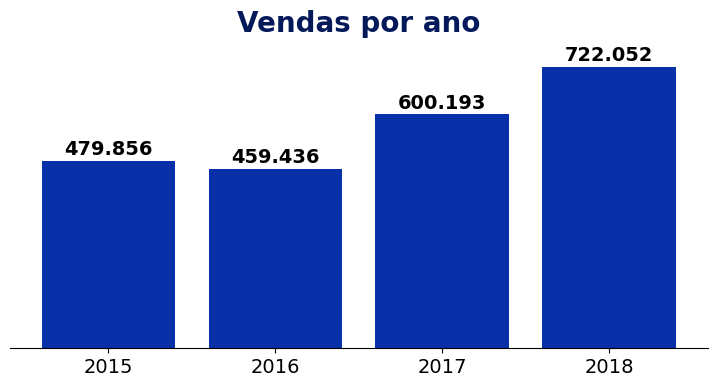

In [14]:
# Criando o gráfico de barras
fig, ax = plt.subplots(figsize = (9,4))

df_vendas_ano = df_base.groupby("Ano")["Sales"].sum() 

ax.bar(df_vendas_ano.index,df_vendas_ano.values,color="#0830a8") 
ax.set_title("Vendas por ano", fontsize=20, fontweight='bold', color='#041959') 

ax.xaxis.set_ticks([2015,2016,2017,2018]) 
ax.tick_params(axis='x',labelsize=14) 

for i in np.arange(0,4):
    ax.annotate('{:,.0f}'.format(df_vendas_ano.values[i]).replace(',', '.'), 
                (df_vendas_ano.index[i],df_vendas_ano.values[i]), 
                ha="center", va="top", xytext=(0,+15), textcoords="offset points",  fontsize=14, fontweight='bold', color="black") 
    
ax.set_yticks(np.array([0,790000])) 
ax.yaxis.set_visible(False) 

ax.spines['top'].set_visible(False) 
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

##### Passo 8 - Visualizando as informações de vendas por ano e mês, utilizando gráficos para responder a pergunta "Como foi a venda nesse período?"

<br>

1. Definindo o tamanho da figura onde ficaram os gráficos 
        
        fig, ax = plt.subplots(figsize = (9,4))

<br>

2. Definindo o tamanho da barra 
        
        wid = 0.2

<br>

3. Definindo o tipo de gráfico e os valores dos eixo X e Y 
* color = Cor das barras
* label = legenda dos dados
* width = Largura das barras
* valor do eixo X = soma_mes[soma_mes.Ano == 2015].Mes.values-wid-wid/2 
* valor do eixo Y = soma_mes[soma_mes.Ano == 2015].Sales.values

        ax.bar(X,Y, parâmetros) → 
        ax.bar(df_vendas_mes[df_vendas_mes.Ano == 2015].Mes.values-wid-wid/2, df_vendas_mes[df_vendas_mes.Ano == 2015].Sales.values, color="#00c698", label=2015, width=wid )

<br>

4. Definindo a exibição das legendas 
        
        ax.legend()

<br>

5. Difinindo o titulo com .set_title e seus parâmetros como tamanho (fontsize), espessura (fontweight) e cor (color) da fonte 

        ax.set_title("Vendas por ano", fontsize=20, fontweight='bold', color='#041959')

<br>

6. Alterando os valores mostrados no eixo X com xaxis.set_ticks (Alterando para 1 a 12) e seus parâmetros com ax.tick_params (Alterando o tamanho dos valores para 10) e ax.set_xticklabels (Alterando as legendas para os nomes dos meses)

        ax.xaxis.set_ticks(np.arange(1,13)) 
        ax.set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'])
        ax.tick_params(axis='x',labelsize=10)

<br>

7. Definindo os rótulos de dados com annotate e seus parâmetros: 
* color = Cor dos rótulos
* fontweight = Espessura da fonte dos rótulos
* fontsize = Tamanho da fonte dos rótulos
* textcoords = Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
* xytext = Deslocamento em relação ao ponto que o texto estaria
* va = Alinhamento vertical do texto
* ha = Alinhamento horizontal do texto
* Texto dos rótulos = '{:,.0f}k'.format(soma_mes[soma_mes.Ano == 2018].Sales.values[i]/1000)
* Posição em relação ao eixo X = soma_mes[soma_mes.Ano == 2018].Mes.values[i]+wid+wid/2
* Posição em relação ao eixo Y = soma_mes[soma_mes.Ano == 2018].Sales.values[i]

        for i in np.arange(0,12):
            ax.annotate('{:,.0f}k'.format(df_vendas_mes[df_vendas_mes.Ano == 2018].Sales.values[i]/1000), 
            (df_vendas_mes[df_vendas_mes.Ano == 2018].Mes.values[i]+wid+wid/2,df_vendas_mes[df_vendas_mes.Ano == 2018].Sales.values[i]), 
            ha="center", va="top", xytext=(5,12), textcoords="offset points", fontsize=10, fontweight='bold', color="#0069c0")
            
<br>

8. Alterando os valores mostrados no eixo Y com .set_yticks para a borda da figura não cortar o rótulo (Alterando o mínimo para 0 e o máximo para 97000)
        
        ax.set_yticks(np.array([0,97000]))

<br>

9. Definindo que os valores do eixo y sejam invisíveis
        
        ax.yaxis.set_visible(False)

<br>

10. Exluindo as bordas da figura

        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)

In [15]:
# Criando uma coluna do Mês
df_base['Mes'] = df_base['Order Date'].dt.month

In [16]:
# soma_mes = agrupamento do somatório das vendas por mês e ano
df_vendas_mes = df_base.groupby(["Mes","Ano"])["Sales"].sum()

# Redefini o índice do Dataframe transformando em colunas
df_vendas_mes = df_vendas_mes.reset_index()

# Visualização do Dataframe
df_vendas_mes.head()

,Mes,Ano,Sales
0,1,2015,14205.7070
1,1,2016,18066.9576
2,1,2017,18542.4910
3,1,2018,43476.4740
4,2,2015,4519.8920


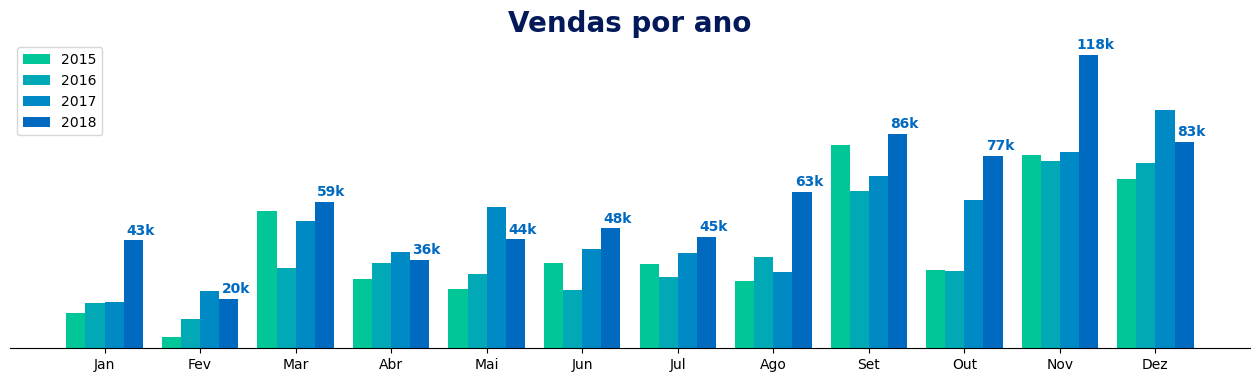

In [17]:
# Criando o gráfico de barras
fig,ax = plt.subplots(figsize = (16,4)) 

wid = 0.2 

ax.bar(df_vendas_mes[df_vendas_mes.Ano == 2015].Mes.values-wid-wid/2, 
       df_vendas_mes[df_vendas_mes.Ano == 2015].Sales.values,
       color="#00c698", label=2015, width=wid)

ax.bar(df_vendas_mes[df_vendas_mes.Ano == 2016].Mes.values-wid/2, 
       df_vendas_mes[df_vendas_mes.Ano == 2016].Sales.values,
       color="#00a9b5", label=2016, width=wid)

ax.bar(df_vendas_mes[df_vendas_mes.Ano == 2017].Mes.values+wid/2, 
       df_vendas_mes[df_vendas_mes.Ano == 2017].Sales.values,
       color="#008ac5", label=2017, width=wid)

ax.bar(df_vendas_mes[df_vendas_mes.Ano == 2018].Mes.values+wid+wid/2, 
       df_vendas_mes[df_vendas_mes.Ano == 2018].Sales.values,
       color="#0069c0", label=2018, width=wid)

ax.legend()

ax.set_title("Vendas por ano", fontsize=20, fontweight='bold', color='#041959')

for i in np.arange(0,12):
    ax.annotate('{:,.0f}k'.format(df_vendas_mes[df_vendas_mes.Ano == 2018].Sales.values[i]/1000), 
                (df_vendas_mes[df_vendas_mes.Ano == 2018].Mes.values[i]+wid+wid/2,df_vendas_mes[df_vendas_mes.Ano == 2018].Sales.values[i]), 
                ha="center", va="top", xytext=(5,12), textcoords="offset points", fontsize=10, fontweight='bold', color="#0069c0")

ax.set_yticks(np.array([0,97000])) 
ax.yaxis.set_visible(False) 
    
ax.spines['top'].set_visible(False) 
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks(np.arange(1,13)) 
ax.set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']) 
ax.tick_params(axis='x',labelsize=10) 

plt.show()

##### Passo 9 - Visualizando as informações de vendas por ano e por categoria, utilizando gráficos para responder a pergunta "Qual foi a categoria mais vendida?"

<br>

1. Definindo o tamanho da figura onde ficaram os gráficos 
        
        fig, ax = plt.subplots(figsize = (16,4))

<br>

2. Definindo o tamanho da barra 
        
        wid = 0.2 

<br>

3. Definindo o tipo de gráfico e os valores dos eixo X e Y 
* color = Cor das barras
* label = legenda dos dados
* width = Largura das barras
* valor do eixo X = categoria[categoria.Category == 'Furniture'].Ano.values-wid
* valor do eixo Y = categoria[categoria.Category == 'Furniture'].Sales.values

        ax.bar(X,Y, parâmetros) → 
        ax.bar(df_vendas_categoria[df_vendas_categoria.Category == 'Furniture'].Ano.values-wid, categoria[df_vendas_categoria.Category == 'Furniture'].Sales.values,
        color="#00c698", label='Furniture', width=wid)       
      
<br>

4. Definindo a exibição das legendas 
        
        ax.legend()

<br>

5. Difinindo o titulo com .set_title e seus parâmetros como tamanho (fontsize), espessura (fontweight) e cor (color) da fonte 

        ax.set_title("Vendas por categoria", fontsize=20, fontweight='bold', color='#041959')

<br>

6. Alterando os valores mostrados no eixo X com xaxis.set_ticks (Alterando para 2015 a 2019) e seus parâmetros com ax.tick_params (Alterando o tamanho dos valores para 12)

        ax.xaxis.set_ticks(np.arange(2015,2019))
        ax.tick_params(axis='x',labelsize=12) 

<br>

7. Definindo os rótulos de dados com annotate e seus parâmetros: 
* color = Cor dos rótulos
* fontweight = Espessura da fonte dos rótulos
* fontsize = Tamanho da fonte dos rótulos
* textcoords = Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
* xytext = Deslocamento em relação ao ponto que o texto estaria
* va = Alinhamento vertical do texto
* ha = Alinhamento horizontal do texto
* Texto dos rótulos = 
    * '{:,.0f}k'.format(df_vendas_categoria[df_vendas_categoria.Category == 'Furniture'].Sales.values[i]/1000)
    * '{:,.0f}k'.format(df_vendas_categoria[df_vendas_categoria.Category == 'Office Supplies'].Sales.values[i]/1000)
    * '{:,.0f}k'.format(df_vendas_categoria[df_vendas_categoria.Category == 'Technology'].Sales.values[i]/1000)
* Posição em relação ao eixo X = 
    * df_vendas_categoria[df_vendas_categoria.Category == 'Furniture'].Ano.values[i]-wid
    * df_vendas_categoria[df_vendas_categoria.Category == 'Office Supplies'].Ano.values[i]
    * df_vendas_categoria[df_vendas_categoria.Category == 'Technology'].Ano.values[i]+wid
* Posição em relação ao eixo Y = 
    * df_vendas_categoria[df_vendas_categoria.Category == 'Furniture'].Sales.values[i]
    * df_vendas_categoria[df_vendas_categoria.Category == 'Office Supplies'].Sales.values[i]
    * df_vendas_categoria[df_vendas_categoria.Category == 'Technology'].Sales.values[i]

            for i in np.arange(0,4):
                ax.annotate('{:,.0f}k'.format(df_vendas_categoria[df_vendas_categoria.Category == 'Furniture'].Sales.values[i]/1000), 
                (df_vendas_categoria[df_vendas_categoria.Category == 'Furniture'].Ano.values[i]-wid,df_vendas_categoria[df_vendas_categoria.Category == 'Furniture'].Sales.values[i]), 
                ha="center", va="top", xytext=(0,15), textcoords="offset points", fontsize=12, fontweight='bold', color="#00c698")
                ax.annotate('{:,.0f}k'.format(df_vendas_categoria[df_vendas_categoria.Category == 'Office Supplies'].Sales.values[i]/1000), 
                (df_vendas_categoria[df_vendas_categoria.Category == 'Office Supplies'].Ano.values[i],df_vendas_categoria[df_vendas_categoria.Category == 'Office Supplies'].Sales.values[i]), 
                ha="center", va="top", xytext=(0,15), textcoords="offset points", fontsize=12, fontweight='bold', color="#00a9b5")
                ax.annotate('{:,.0f}k'.format(df_vendas_categoria[df_vendas_categoria.Category == 'Technology'].Sales.values[i]/1000), 
                (df_vendas_categoria[df_vendas_categoria.Category == 'Technology'].Ano.values[i]+wid,df_vendas_categoria[df_vendas_categoria.Category == 'Technology'].Sales.values[i]), 
                ha="center", va="top", xytext=(0,15), textcoords="offset points", fontsize=12, fontweight='bold', color="#008ac5")
                
<br>

8. Alterando os valores mostrados no eixo Y com .set_yticks para a borda da figura não cortar o rótulo (Alterando o mínimo para 0 e o máximo para 350000)
        
        ax.set_yticks(np.array([0,350000]))

<br>

9. Definindo que os valores do eixo y sejam invisíveis
        
        ax.yaxis.set_visible(False)
 
<br>

10. Exluindo as bordas da figura

        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)

In [18]:
# categoria = agrupamento do somatório das vendas por ano e categoria
df_vendas_categoria = df_base.groupby(["Category","Ano"])["Sales"].sum()

# Redefini o índice do Dataframe transformando em colunas
df_vendas_categoria = df_vendas_categoria.reset_index()

# Visualização do Dataframe
df_vendas_categoria.head()

,Category,Ano,Sales
0,Furniture,2015,156477.8811
1,Furniture,2016,164053.8674
2,Furniture,2017,195813.0400
3,Furniture,2018,212313.7872
4,Office Supplies,2015,149512.8200


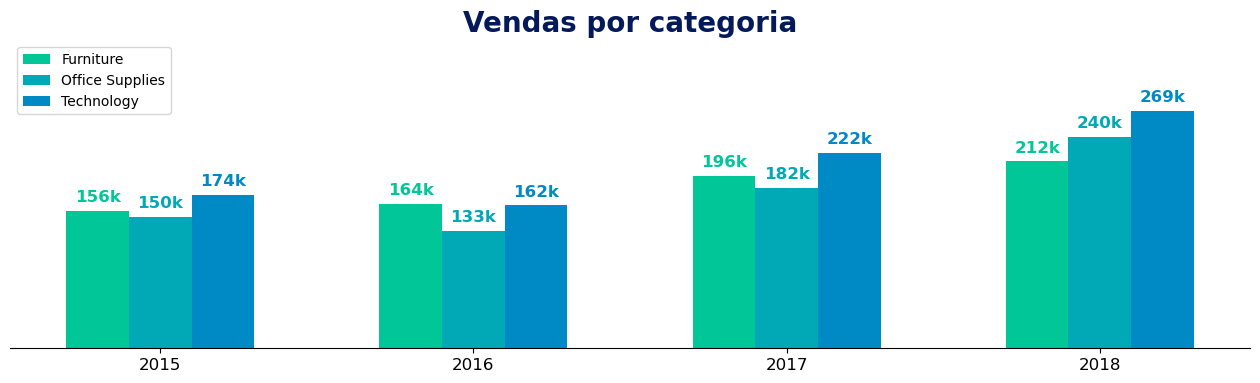

In [19]:
# Criando o gráfico de barras
fig, ax = plt.subplots(figsize = (16,4)) 

wid = 0.2 

ax.bar(df_vendas_categoria[df_vendas_categoria.Category == 'Furniture'].Ano.values-wid, 
       df_vendas_categoria[df_vendas_categoria.Category == 'Furniture'].Sales.values,
       color="#00c698", label='Furniture',width=wid)

ax.bar(df_vendas_categoria[df_vendas_categoria.Category == 'Office Supplies'].Ano.values, 
       df_vendas_categoria[df_vendas_categoria.Category == 'Office Supplies'].Sales.values,
       color="#00a9b5", label='Office Supplies', width=wid)

ax.bar(df_vendas_categoria[df_vendas_categoria.Category == 'Technology'].Ano.values+wid, 
       df_vendas_categoria[df_vendas_categoria.Category == 'Technology'].Sales.values,
       color="#008ac5", label='Technology', width=wid)

ax.legend()

ax.set_title("Vendas por categoria", fontsize=20, fontweight='bold', color='#041959')

for i in np.arange(0,4):
    ax.annotate('{:,.0f}k'.format(df_vendas_categoria[df_vendas_categoria.Category == 'Furniture'].Sales.values[i]/1000), 
                (df_vendas_categoria[df_vendas_categoria.Category == 'Furniture'].Ano.values[i]-wid,df_vendas_categoria[df_vendas_categoria.Category == 'Furniture'].Sales.values[i]), 
                ha="center", va="top", xytext=(0,15), textcoords="offset points", fontsize=12, fontweight='bold', color="#00c698")
    ax.annotate('{:,.0f}k'.format(df_vendas_categoria[df_vendas_categoria.Category == 'Office Supplies'].Sales.values[i]/1000), 
                (df_vendas_categoria[df_vendas_categoria.Category == 'Office Supplies'].Ano.values[i],df_vendas_categoria[df_vendas_categoria.Category == 'Office Supplies'].Sales.values[i]), 
                ha="center", va="top", xytext=(0,15), textcoords="offset points", fontsize=12, fontweight='bold', color="#00a9b5")
    ax.annotate('{:,.0f}k'.format(df_vendas_categoria[df_vendas_categoria.Category == 'Technology'].Sales.values[i]/1000), 
                (df_vendas_categoria[df_vendas_categoria.Category == 'Technology'].Ano.values[i]+wid,df_vendas_categoria[df_vendas_categoria.Category == 'Technology'].Sales.values[i]), 
                ha="center", va="top", xytext=(0,15), textcoords="offset points", fontsize=12, fontweight='bold', color="#008ac5")   
    
ax.set_yticks(np.array([0,350000]))
ax.yaxis.set_visible(False) 

ax.spines['top'].set_visible(False) 
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks(np.arange(2015,2019)) 
ax.tick_params(axis='x',labelsize=12) 

plt.show()

##### Passo 10 - Visualizando as informações de vendas por produto, utilizando gráficos para responder a pergunta "Qual foi o item mais vendido?"

<br>

1. Definindo o tamanho da figura onde ficaram os gráficos 
        
        fig, ax = plt.subplots(figsize = (16,12))

<br>

2. Definindo o tipo de gráfico e os valores dos eixo X e Y 
* align = Alinhamento
* valor do eixo X = df_top_n_produtos['Sales'].values
* valor do eixo Y = df_top_n_produtos['Product Name'].values

        ax.barh(X,Y, parâmetros) →     
        ax.barh(df_top_n_produtos['Product Name'].values, df_top_n_produtos['Sales'].values, align='center')  
        
<br>

3. Inverter o eixo Y (Do maior para o menor)
        
        ax.invert_yaxis()

<br>

4. Difinindo o titulo com .set_title e seus parâmetros como tamanho (fontsize), espessura (fontweight) e cor (color) da fonte 

        ax.set_title("Top 10 Produtos mais vendidos", fontsize=20, fontweight='bold', color='#041959')

<br>

5. Definindo os rótulos de dados com annotate e seus parâmetros: 
* color = Cor dos rótulos
* fontweight = Espessura da fonte dos rótulos
* fontsize = Tamanho da fonte dos rótulos
* textcoords = Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
* xytext = Deslocamento em relação ao ponto que o texto estaria
* va = Alinhamento vertical do texto
* ha = Alinhamento horizontal do texto
* Texto dos rótulos = '{:,.0f}k'.format(df_top_n_itens['Sales'].values[i]/1000)
* Posição em relação ao eixo X = df_top_n_itens['Sales'].values[i]
* Posição em relação ao eixo Y = i

            for i in np.arange(0,n):
                ax.annotate('{:,.0f}k'.format(df_top_n_produtos['Sales'].values[i]/1000), (df_top_n_produtos['Sales'].values[i],i), 
                ha="center", va="top", xytext=(-15,3), textcoords="offset points", fontsize=12, fontweight='bold', color="white")
                
<br>

6. Definindo que os valores do eixo X sejam invisíveis
        
       ax.xaxis.set_visible(False) 

<br>

7. Exluindo as bordas da figura

        ax.spines['top'].set_visible(False) 
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)

In [20]:
# itens = agrupamento do somatório das vendas por produto
df_vendas_produtos = df_base.groupby("Product Name")["Sales"].sum()

# Redefini o índice do Dataframe transformando em colunas
df_vendas_produtos = df_vendas_produtos.reset_index()

# Reordenando os valores de vendas em ordem decrescente
df_vendas_produtos = df_vendas_produtos.sort_values("Sales",ascending=False)

# Visualização do Dataframe
df_vendas_produtos.head()

# Definindo o top n produtos
n = 10
df_top_n_produtos = df_vendas_produtos.head(n)
df_top_n_produtos

,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
785,HON 5400 Series Task Chairs for Big and Tall,21870.576
685,GBC DocuBind TL300 Electric Binding System,19823.479
687,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
804,Hewlett Packard LaserJet 3310 Copier,18839.686
786,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
682,GBC DocuBind P400 Electric Binding System,17965.068
812,High Speed Automatic Electric Letter Opener,17030.312


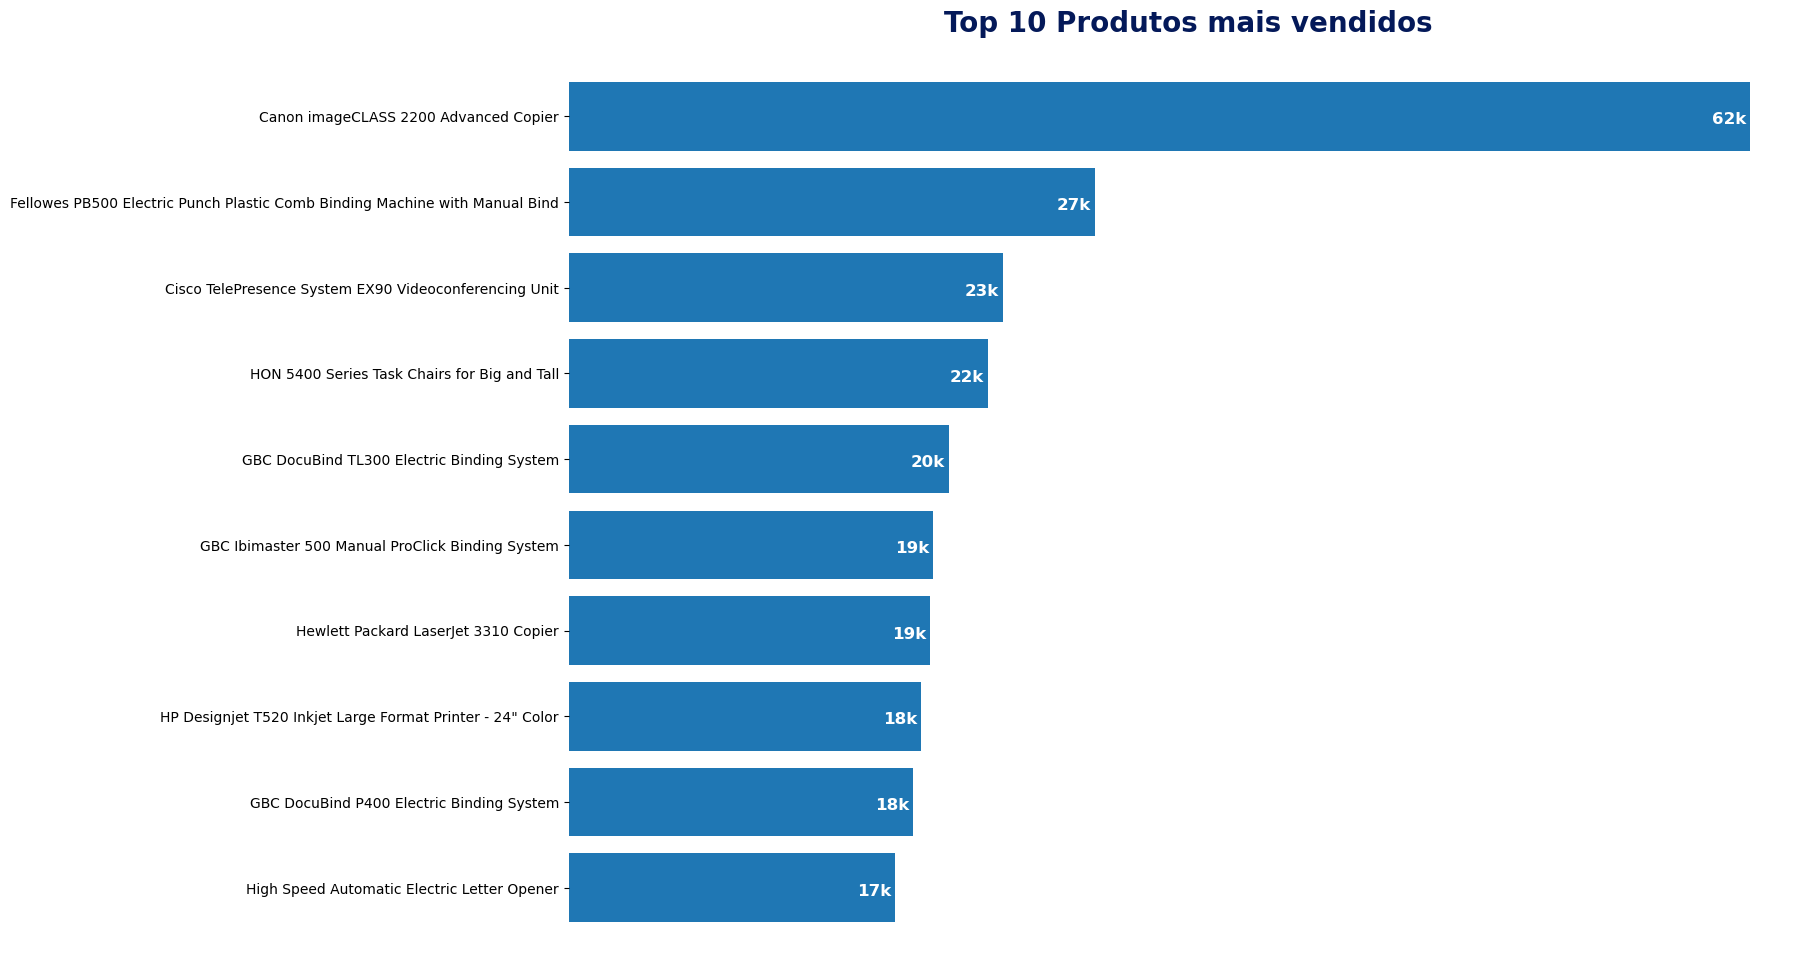

In [21]:
# Criando o gráfico de barras horizontal
fig, ax = plt.subplots(figsize = (16,12))

ax.barh(df_top_n_produtos['Product Name'].values, df_top_n_produtos['Sales'].values, align='center')

ax.invert_yaxis() 

ax.set_title("Top 10 Produtos mais vendidos", fontsize=20, fontweight='bold', color='#041959')

for i in np.arange(0,n):
    ax.annotate('{:,.0f}k'.format(df_top_n_produtos['Sales'].values[i]/1000), 
                (df_top_n_produtos['Sales'].values[i],i), 
                ha="center", va="top", xytext=(-15,3), textcoords="offset points", fontsize=12, fontweight='bold', color="white")
    
ax.xaxis.set_visible(False) 

ax.spines['top'].set_visible(False) 
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

##### Passo 11 - Visualizando as informações de vendas por produto e por ano, utilizando gráficos para responder a pergunta "Qual foi o item mais vendido por ano?"
1. Criando um Dataframe "df_vendas_produtos_ano" com o somatório das vendas por produto e por ano, utilizando o Groupby.
2. Criando um Dataframe "df_anos" com os 4 anos
3. Criando uma coluna "União" no Dataframe "df_vendas_produtos" e no Dataframe "df_anos" para terem uma coluna comum
4. Criando um Dataframe "df_top_n_produtos" dos 10 produtos mais vendidos
5. Criando um Dataframe "df_top_n_produtos_ano" dos 10 produtos mais vendidos por ano, utilizando Merge e a coluna "União" (Unindo os dataframes "df_anos" e "df_top_n_produtos" = junção outer)
6. Criando um Dataframe "df_vendas_top_n_produtos_ano" dos 10 produtos mais vendidos por ano para gerar o gráfico, utilizando Merge (Unindo os dataframes df_vendas_produtos_ano e df_top_n_produtos_ano = junção left)

In [22]:
# Criando um Dataframe "df_vendas_produtos_ano" com o somatório das vendas por produto e por ano, utilizando o Groupby.

# df_vendas_produtos_ano = agrupamento do somatório das vendas por produto e por ano
df_vendas_produtos_ano = df_base.groupby(["Product Name","Ano"])["Sales"].sum()

# Redefini o índice do Dataframe transformando em colunas
df_vendas_produtos_ano = df_vendas_produtos_ano.reset_index()

# Visualização do Dataframe
display(df_vendas_produtos_ano.head())

,Product Name,Ano,Sales
0,"""While you Were Out"" Message Book, One Form pe...",2018,25.228
1,"#10 Gummed Flap White Envelopes, 100/Box",2016,6.608
2,"#10 Gummed Flap White Envelopes, 100/Box",2017,24.780
3,"#10 Gummed Flap White Envelopes, 100/Box",2018,9.912
4,#10 Self-Seal White Envelopes,2017,86.502


In [23]:
# Criando um Dataframe "df_anos" com os 4 anos
df_anos = pd.DataFrame([2018,2017,2016,2015])
df_anos.columns = ['Ano']
df_anos

,Ano
0,2018
1,2017
2,2016
3,2015


In [24]:
# Criando uma coluna "União" no Dataframe "df_vendas_produtos" e no Dataframe "df_anos" para terem uma coluna comum
df_anos['uniao'] = 'unir'
df_vendas_produtos['uniao'] = 'unir'

In [25]:
# Criando um Dataframe "df_top_n_produtos" dos 10 produtos mais vendidos
n = 10
df_top_n_produtos = df_vendas_produtos.head(n)

In [26]:
# Criando um Dataframe "df_top_n_produtos_ano" dos 10 produtos mais vendidos por ano, utilizando Merge e a coluna "União"
df_top_n_produtos_ano = pd.merge(df_top_n_produtos, df_anos, how='outer', on='uniao') 
df_top_n_produtos_ano.head()

,Product Name,Sales,uniao,Ano
0,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2018
1,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2017
2,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2016
3,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2015
4,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,unir,2018


In [27]:
# Criando um Dataframe "df_vendas_top_n_produtos_ano" dos 10 produtos mais vendidos por ano para gerar o gráfico, utilizando Merge 
df_vendas_top_n_produtos_ano = pd.merge(df_top_n_produtos_ano, df_vendas_produtos_ano, how='left', on=['Product Name','Ano'])
        
df_vendas_top_n_produtos_ano.head(10)

,Product Name,Sales_x,uniao,Ano,Sales_y
0,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2018,35699.898
1,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2017,25899.926
2,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2016,NaN
3,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2015,NaN
4,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,unir,2018,7371.742
5,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,unir,2017,2287.782
6,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,unir,2016,15760.276
7,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,unir,2015,2033.584
8,Cisco TelePresence System EX90 Videoconferenci...,22638.480,unir,2018,NaN
9,Cisco TelePresence System EX90 Videoconferenci...,22638.480,unir,2017,NaN


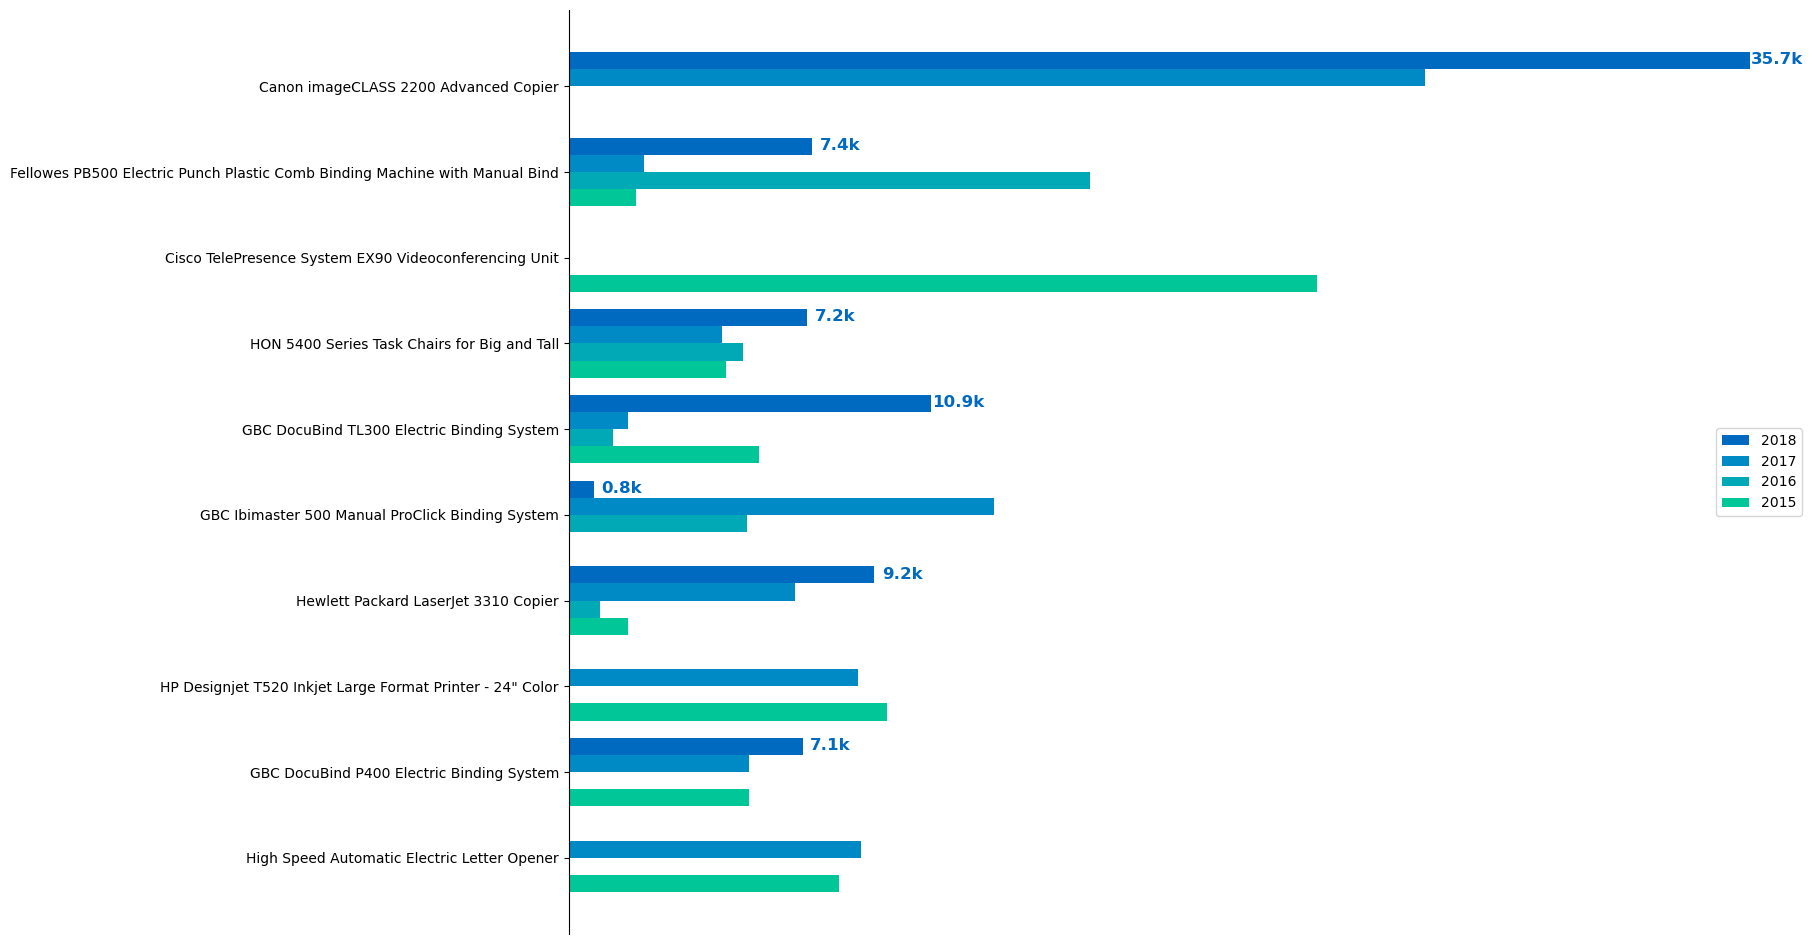

In [28]:
# Criando o gráfico de barras horizontal
fig,ax = plt.subplots(figsize = (16,12))

hgt = 0.2 

qtd_itens = len(df_top_n_produtos)

ax.barh(np.arange(0,qtd_itens)-hgt-hgt/2, 
        df_vendas_top_n_produtos_ano[df_vendas_top_n_produtos_ano.Ano == 2018].Sales_y.values, 
        align='center',height=hgt, label=2018,color="#0069c0")

ax.barh(np.arange(0,qtd_itens)-hgt/2,
        df_vendas_top_n_produtos_ano[df_vendas_top_n_produtos_ano.Ano == 2017].Sales_y.values, 
        align='center',height=hgt,label=2017,color="#008ac5")

ax.barh(np.arange(0,qtd_itens)+hgt/2, 
        df_vendas_top_n_produtos_ano[df_vendas_top_n_produtos_ano.Ano == 2016].Sales_y.values, 
        align='center',height=hgt,label=2016,color="#00a9b5")

ax.barh(np.arange(0,qtd_itens)+hgt+hgt/2, 
        df_vendas_top_n_produtos_ano[df_vendas_top_n_produtos_ano.Ano == 2015].Sales_y.values, 
        align='center',height=hgt,label=2015,color="#00c698")

ax.invert_yaxis() 

ax.legend()

for i in np.arange(0,qtd_itens):
    ax.annotate('{:,.1f}k'.format(df_vendas_top_n_produtos_ano[df_vendas_top_n_produtos_ano.Ano == 2018].Sales_y.values[i]/1000), 
                (df_vendas_top_n_produtos_ano[df_vendas_top_n_produtos_ano.Ano == 2018].Sales_y.values[i],i-hgt-hgt/2), 
                ha="center", va="top", xytext=(20,6), textcoords="offset points", fontsize=12, fontweight='bold', color="#0069c0")
    
ax.yaxis.set_ticks(np.arange(0,qtd_itens)) 
ax.set_yticklabels(df_top_n_produtos["Product Name"]) 
ax.tick_params(axis='y',labelsize=10) 

ax.xaxis.set_visible(False) 

ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

##### Extra: Criando um gráfico de linhas das vendas por ano e mês

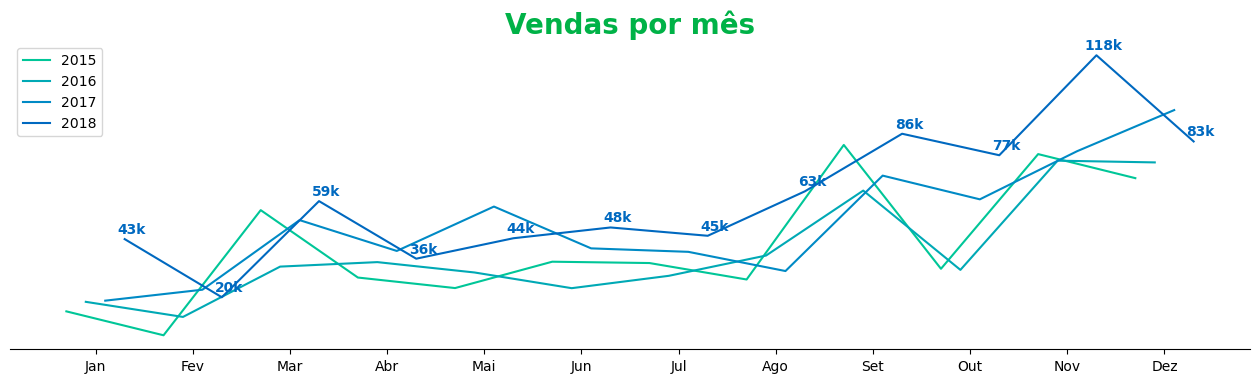

In [29]:
fig,ax = plt.subplots(figsize = (16,4))

ax.set_title("Vendas por mês", fontsize=20, fontweight='bold', color='#00b247')

wid = 0.2 

ax.plot(df_vendas_mes[df_vendas_mes.Ano == 2015].Mes.values-wid-wid/2, 
       df_vendas_mes[df_vendas_mes.Ano == 2015].Sales.values,
       color="#00c698",label=2015)

ax.plot(df_vendas_mes[df_vendas_mes.Ano == 2016].Mes.values-wid/2, 
       df_vendas_mes[df_vendas_mes.Ano == 2016].Sales.values,
       color="#00a9b5",label=2016)

ax.plot(df_vendas_mes[df_vendas_mes.Ano == 2017].Mes.values+wid/2, 
       df_vendas_mes[df_vendas_mes.Ano == 2017].Sales.values,
       color="#008ac5", label=2017)

ax.plot(df_vendas_mes[df_vendas_mes.Ano == 2018].Mes.values+wid+wid/2, 
       df_vendas_mes[df_vendas_mes.Ano == 2018].Sales.values,
       color="#0069c0", label=2018)

ax.legend()

for i in np.arange(0,12):
    ax.annotate('{:,.0f}k'.format(df_vendas_mes[df_vendas_mes.Ano == 2018].Sales.values[i]/1000), 
                (df_vendas_mes[df_vendas_mes.Ano == 2018].Mes.values[i]+wid+wid/2,df_vendas_mes[df_vendas_mes.Ano == 2018].Sales.values[i]), 
                ha="center", va="top", xytext=(5,12), textcoords="offset points", fontsize=10, fontweight='bold', color="#0069c0")

ax.set_yticks(np.array([0,97000])) 
ax.yaxis.set_visible(False) 
    
ax.spines['top'].set_visible(False) 
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks(np.arange(1,13)) 
ax.set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']) 
ax.tick_params(axis='x',labelsize=10) 

plt.show()

### Salvar os gráficos como imagens <br>

##### Gráfico Vendas por ano  
    plt.savefig('Vendas por ano',transparent=True)

<br>

##### Gráfico Vendas por mês   
    plt.savefig('Vendas por mes',transparent=True)

<br>

##### Gráfico Vendas por categoria   
    plt.savefig('Vendas por categoria',transparent=True) 

<br>

##### Gráfico Top 10 produtos vendidos 
    plt.tight_layout()
    plt.savefig('Top 10 produtos vendidos',transparent=True) 

<br>

##### Gráfico Top 10 produtos vendidos por ano 
    plt.tight_layout()
    plt.savefig('Top 10 produtos vendidos por ano',transparent=True)